# **Getting Started**

Import the files and merge them into 1 file. Have a brief look at the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



the path in google drive

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/data science/Data_Visualization

/content/drive/My Drive/Colab Notebooks/data science/Data_Visualization


In [ ]:
#import all files
data_1 = pd.read_csv('Sales_January_2019.csv')
data_2 = pd.read_csv('Sales_February_2019.csv')
data_3 = pd.read_csv('Sales_March_2019.csv')
data_4 = pd.read_csv('Sales_April_2019.csv')
data_5 = pd.read_csv('Sales_May_2019.csv')
data_6 = pd.read_csv('Sales_June_2019.csv')
data_7 = pd.read_csv('Sales_July_2019.csv')
data_8 = pd.read_csv('Sales_August_2019.csv')
data_9 = pd.read_csv('Sales_September_2019.csv')
data_10 = pd.read_csv('Sales_October_2019.csv')
data_11 = pd.read_csv('Sales_November_2019.csv')
data_12 = pd.read_csv('Sales_December_2019.csv')

#concat them into 1 file
data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12],axis=0)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
#get a general feel about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
#Check if there is missing value
print("***Below indicates all missing values each column has***")
null_data = data.isnull().sum()
null_data


***Below indicates all missing values each column has***


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#Create new variables


Create 5 news variables: Year, month, time, revenue, and city for visualization

In [ ]:
#drop null value and clean the data
data_cleaned = data.dropna()
data_cleaned = data_cleaned[data_cleaned['Order Date'].str[0:2] != 'Or']

In [ ]:
#we will have to convert any column with special values to its type 
data_cleaned['Quantity Ordered'] = data_cleaned['Quantity Ordered'].astype('int') #the quanity will be integr
data_cleaned['Price Each'] = data_cleaned['Price Each'].astype('float') #price will be float
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date']) #and the date will be in the datetime format
data_cleaned.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [ ]:
data_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [ ]:
#add in 5 new variables
data_cleaned['Year'] = data_cleaned['Order Date'].dt.year #get the year 
data_cleaned['Month'] = data_cleaned['Order Date'].dt.month #get the month
data_cleaned['Time'] = data_cleaned['Order Date'].dt.hour #get the hour
data_cleaned['Revenue'] = data_cleaned['Quantity Ordered'] * data_cleaned['Price Each'] #revenue = quantity * price
data_cleaned['City'] = data_cleaned['Purchase Address'].str.split(", ", expand=True)[1] #get the city from the address
data_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Time,Revenue,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,21,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,14,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,13,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,20,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,11,11.99,Austin
...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019,12,20,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019,12,12,7.68,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019,12,6,400.00,Seattle
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019,12,10,11.99,Dallas


# **Visualization**

##price of products and quantity ordered

In [ ]:
#to look at only the price of each product, I drop the duplicates of the product so not the data only 
#have 19 rows match with 19 products
price_each = data_cleaned.drop_duplicates(subset = 'Product').sort_values(by=['Price Each'], ascending = True) #sort in ascending order for better visualization
price_each

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Time,Revenue,City
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",2019,1,20,2.99,San Francisco
19,141253,AA Batteries (4-pack),1,3.84,2019-01-17 00:09:00,"385 11th St, Atlanta, GA 30301",2019,1,0,3.84,Atlanta
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",2019,1,12,11.95,San Francisco
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,13,23.98,San Francisco
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,14,14.95,Portland
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",2019,1,10,99.99,Los Angeles
56,141289,20in Monitor,1,109.99,2019-01-28 11:17:00,"534 Elm St, Atlanta, GA 30301",2019,1,11,109.99,Atlanta
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,20,149.99,Los Angeles
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",2019,1,21,150.00,San Francisco
14,141248,Flatscreen TV,1,300.00,2019-01-03 21:54:00,"363 Spruce St, Austin, TX 73301",2019,1,21,300.00,Austin


In [ ]:
#group the data by product and price to find the sum of the columns
#we only care about the quantity ordered and the revenue
data_by_product = data_cleaned.groupby(['Product', 'Price Each'], as_index=False).sum().sort_values(by=['Price Each'], ascending = True)
data_by_product

,Product,Price Each,Quantity Ordered,Year,Month,Time,Revenue
5,AAA Batteries (4-pack),2.99,31017,41674182,146370,297332,92740.83
4,AA Batteries (4-pack),3.84,27635,41544963,145558,298342,106118.40
15,USB-C Charging Cable,11.95,23975,44222161,154819,314645,286501.25
17,Wired Headphones,11.99,20557,38122759,133397,271720,246478.43
12,Lightning Charging Cable,14.95,23217,43727507,153092,312529,347094.15
7,Bose SoundSport Headphones,99.99,13457,26903178,94113,192445,1345565.43
0,20in Monitor,109.99,4129,8279921,29336,58764,454148.71
2,27in FHD Monitor,149.99,7550,15156636,52558,107540,1132424.50
6,Apple Airpods Headphones,150.00,15661,31393435,109477,223304,2349150.00
8,Flatscreen TV,300.00,4819,9691201,34224,68815,1445700.00


In [1]:
#this plot will have 2 graphs

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
x_price_each = price_each['Product']
y_price_each = price_each['Price Each']
ax[0].bar(x_price_each, y_price_each) #graph the price of each product
ax[0].set_title('Price of each product') 
ax[0].set_ylabel('Dollar $')
ax[0].set_xticklabels(x_price_each, rotation=90) #make sure to show all x labels

ax[1].bar(data_by_product['Product'], data_by_product['Quantity Ordered'], color = 'orange') #graph the total quantity order
ax[1].set_title('Quantity Ordered by Product')
ax[1].set(ylabel='Products')
ax[1].set_xticklabels(x_price_each, rotation=90)


plt.show()

NameError: ignored

##data by month

In [ ]:
#group the data by month, we only care about the orders and revenue
data_by_month = data_cleaned.groupby(['Month']).sum()
data_by_month

,Quantity Ordered,Price Each,Year,Time,Revenue
Month,,,,,
1,10903,1811768.38,19602505,139485,1822256.73
2,13449,2188884.72,24177525,172669,2202022.42
3,17005,2791207.83,30593907,218969,2807100.38
4,20558,3367671.02,36905301,262259,3390670.24
5,18667,3135125.13,33446754,238780,3152606.75
6,15253,2562025.61,27365526,195528,2577802.26
7,16072,2632539.56,28857567,206169,2647775.76
8,13448,2230345.42,24149259,172289,2244467.88
9,13109,2084992.09,23462799,168513,2097560.13


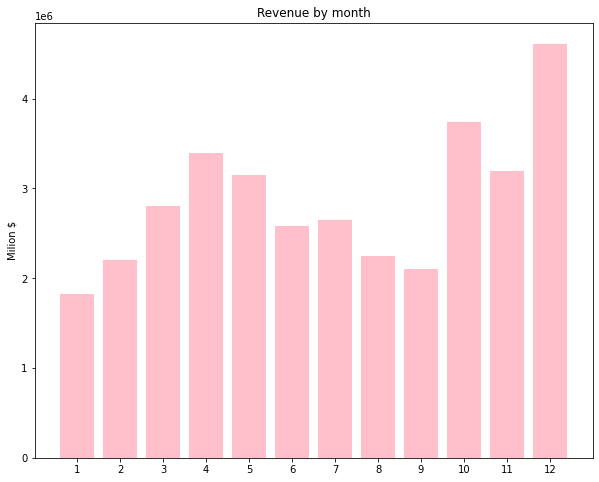

In [ ]:
fig = plt.subplots(figsize =(10, 8))
month = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] #to show all months, they have to be in string format
plt.bar(month, data_by_month['Revenue'], color = 'pink') #plot the revenue from each month

plt.title('Revenue by month')
plt.ylabel('Milion $')
plt.show()

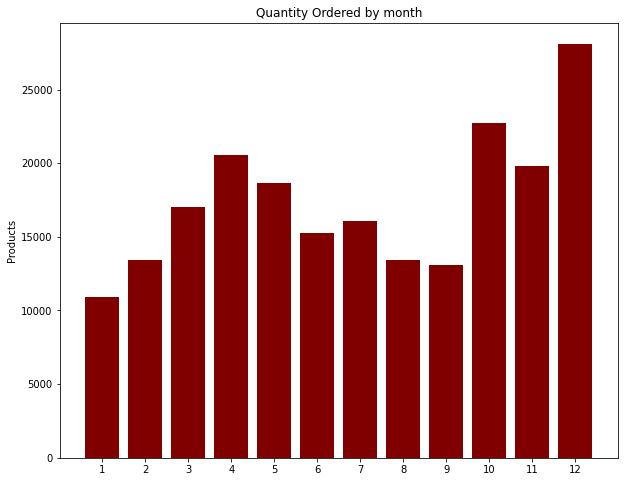

In [ ]:
fig = plt.subplots(figsize =(10, 8))
month = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
plt.bar(month, data_by_month['Quantity Ordered'], color = 'maroon') #plot the quantity ordered in each month

plt.title('Quantity Ordered by month')
plt.ylabel('Products')
plt.show()

##data by city

In [ ]:
#group the data by city, again, we only care about the quantity ordered and revenue
data_by_city = data_cleaned.groupby(['City']).sum()
data_by_city

,Quantity Ordered,Price Each,Year,Month,Time,Revenue
City,,,,,,
Atlanta,16602,2779908.20,30044739,104794,214264,2795498.58
Austin,11153,1809873.61,19998197,69829,141946,1819581.75
Boston,22528,3637409.77,40246750,141112,288225,3661642.01
Dallas,16730,2752627.82,29921582,104620,214390,2767975.40
Los Angeles,33289,5421435.23,59772496,208325,427444,5452570.80
New York City,27932,4635370.83,50224654,175741,357696,4664317.43
Portland,14053,2307747.47,25166837,87765,179632,2320490.61
San Francisco,50239,8211461.74,90313920,315520,643265,8262203.91
Seattle,16553,2733296.01,29743909,104941,213292,2747755.48


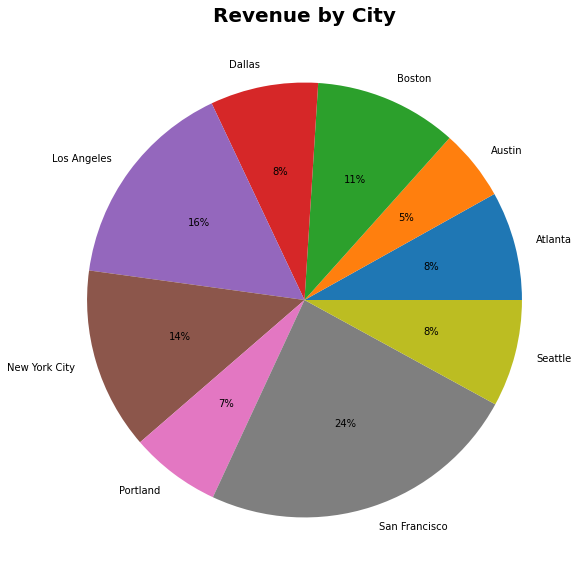

In [ ]:
fig = plt.subplots(figsize =(12, 10))
#plot the percentage of revenue of each city
plt.pie(data_by_city['Revenue'], labels = data_by_city.index, autopct='%1.0f%%')#autopct to show the percentage

plt.title('Revenue by City', weight = 'bold', fontsize = 20)
plt.show()

##data by time

In [ ]:
#group the data by hour
data_by_time = data_cleaned.groupby(['Time']).sum()
data_by_time

,Quantity Ordered,Price Each,Year,Month,Revenue
Time,,,,,
0,4428,709296.70,7894302,27554,713721.27
1,2619,458490.00,4744659,16657,460866.88
2,1398,233833.64,2509621,8507,234851.44
3,928,144726.42,1677792,5904,145757.89
4,937,162058.18,1724230,6148,162661.01
5,1493,229621.21,2667101,9301,230679.82
6,2810,445000.11,5011158,17539,448113.00
7,4556,740568.11,8098209,28850,744854.12
8,7002,1185970.62,12630864,43626,1192348.97


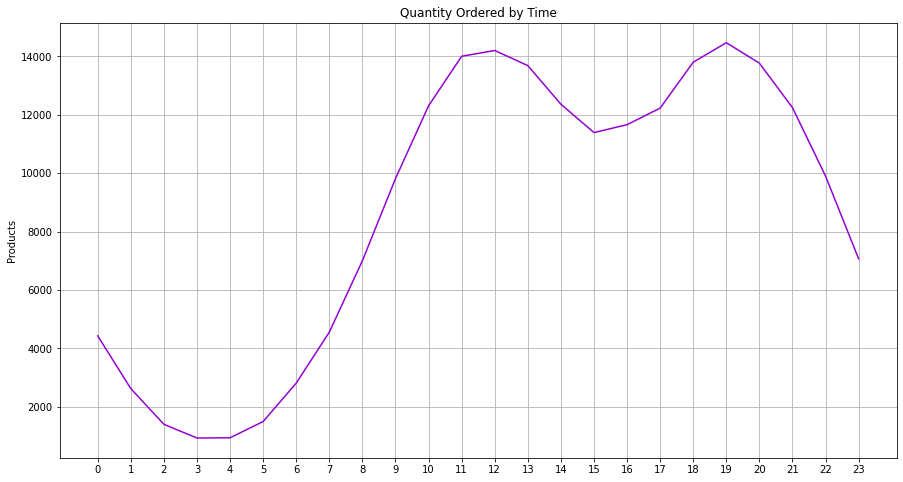

In [ ]:
fig = plt.subplots(figsize =(15, 8))
#for x-axis to show all values, time need to be in string format
time = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
plt.plot(time, data_by_time['Quantity Ordered'], color = 'darkviolet')

plt.title('Quantity Ordered by Time')
plt.ylabel('Products')
plt.grid(True) #add in grid to support visual effect
plt.show()